In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
checkpoint = "pious-grass-26"
iter = 1

In [16]:
cp_path = os.path.join("/mnt/qb/work2/goswami0/gkd965/checkpoints/",checkpoint)
gamma = np.load(os.path.join(cp_path,"gamma.npy"))
# beta  = np.load(os.path.join(cp_path,"beta.npy"))

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/qb/work2/goswami0/gkd965/checkpoints/pious-grass-26/beta.npy'

NameError: name 'beta' is not defined

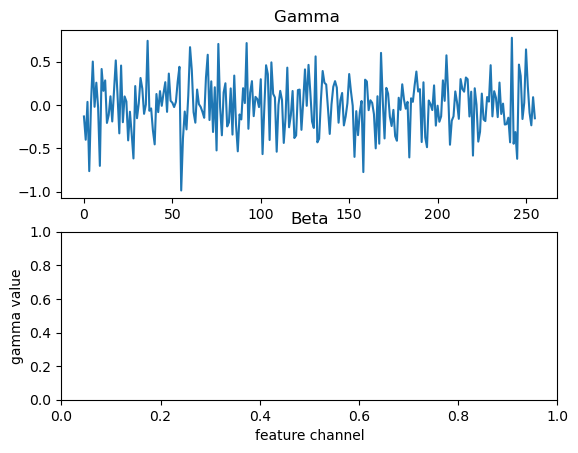

In [15]:
fig, ax = plt.subplots(2)
ax[0].set_title("Gamma ")
ax[1].set_title("Beta")
plt.xlabel("feature channel")
plt.ylabel("gamma value")
ax[0].plot(gamma)
# ax[1].plot(beta)

In [ ]:
plt.title("Gamma Distribution ")
plt.xlabel("feature channel")
plt.ylabel("gamma value")
plt.plot(gamma)

In [1]:
from IPython.display import display_pdf
img_path = "/mnt/qb/work2/goswami0/gkd965/checkpoints/lemon-breeze-29/" + 'checkpoint_sfno_film_gcn_epoch=1500.pkl_MSE Normalised_valid_steps5.pdf'
with open(img_path, "rb") as f:
    display_pdf(f.read(),raw=True)